In [ ]:
!pip show torch

Name: torch
Version: 2.1.0+cu118
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, triton, typing-extensions
Required-by: fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import autograd

In [ ]:
#y = ax^2 + bx + c
x = torch.tensor(1.)
a = torch.tensor(1.,requires_grad=True)
b = torch.tensor(2.,requires_grad=True)
c = torch.tensor(3., requires_grad=True)
y = a**2 * x + b * x + c

In [ ]:
print(a.grad, b.grad, c.grad)
grads = autograd.grad(y, [a, b, c])
print(grads[0], grads[1], grads[2])


None None None
tensor(2.) tensor(1.) tensor(1.)


In [ ]:
import numpy as np
#y = x^2 * sin(x)
x = torch.tensor(14.2763, requires_grad=True)
y = x**2 * torch.sin(x)
y.backward()
print(x.grad)

tensor(0.0109)


In [ ]:
import torch.nn as nn
import torch.optim as optim

# 1. Generate synthetic data for linear regression with Gaussian noise

# True parameters
true_w = torch.tensor([2.0])
true_b = torch.tensor([3.0])

# Input data
x = torch.linspace(-1, 1, 100).reshape(-1, 1)

# True linear relationship
y = true_w * x + true_b

# Add Gaussian noise
noise_std_dev = 0.1
noise = torch.randn(y.size()) * noise_std_dev
y_noisy = y + noise

# 2. Implement a simple linear regression model using PyTorch

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 input feature, 1 output feature

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 3. Train the model on the noisy data

epochs = 1000
for epoch in range(epochs):
    # Forward pass
    predictions = model(x)
    loss = criterion(predictions, y_noisy)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print(f'Learned weight: {model.linear.weight.item()}')
print(f'Learned bias: {model.linear.bias.item()}')

Epoch [100/1000], Loss: 0.2489
Epoch [200/1000], Loss: 0.0434
Epoch [300/1000], Loss: 0.0172
Epoch [400/1000], Loss: 0.0110
Epoch [500/1000], Loss: 0.0094
Epoch [600/1000], Loss: 0.0090
Epoch [700/1000], Loss: 0.0089
Epoch [800/1000], Loss: 0.0089
Epoch [900/1000], Loss: 0.0089
Epoch [1000/1000], Loss: 0.0089
Learned weight: 1.9956767559051514
Learned bias: 3.0059030055999756


In [ ]:
print(model.linear.weight)

Parameter containing:
tensor([[1.9957]], requires_grad=True)


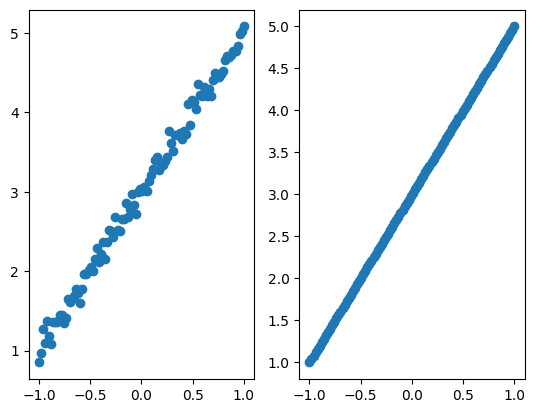

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)  # 2x1 grid, first plot
ax2 = fig.add_subplot(1, 2, 2)  # 2x1 grid, second plot
ax1.scatter(x, y_noisy)
ax2.scatter(x, y)
fig.show()